In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
sns.set()


In [2]:
# Function to check performance metric for classifer

def evaluate_model(model, X_train, y_train, X_test, y_test):
    _ = model.fit(X_train, y_train)
    print("Precision-Recall report=" , precision_recall_fscore_support(y_test, model.predict(X_test), average='weighted'))
    print("Accuracy Score=",accuracy_score(y_test,model.predict(X_test)))

## Load dataset

In [3]:
column_list = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
abalone_df = pd.read_table("abalone.data",sep=",",header=None,names=column_list)
abalone_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:

numerical_features = ["Length", 'Diameter', 'Height','Whole weight','Shucked weight', 'Viscera weight', 'Shell weight']
target = 'Rings'

In [5]:
abalone_df.isna().mean().to_frame(name='% of missing values') # No missing values

,% of missing values
Sex,0.0
Length,0.0
Diameter,0.0
Height,0.0
Whole weight,0.0
Shucked weight,0.0
Viscera weight,0.0
Shell weight,0.0
Rings,0.0


In [6]:
abalone_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
abalone_df["Rings"].value_counts().to_frame("Ring Count")

,Ring Count
9,689
10,634
8,568
11,487
7,391
12,267
6,259
13,203
14,126
5,115


## Heatmap

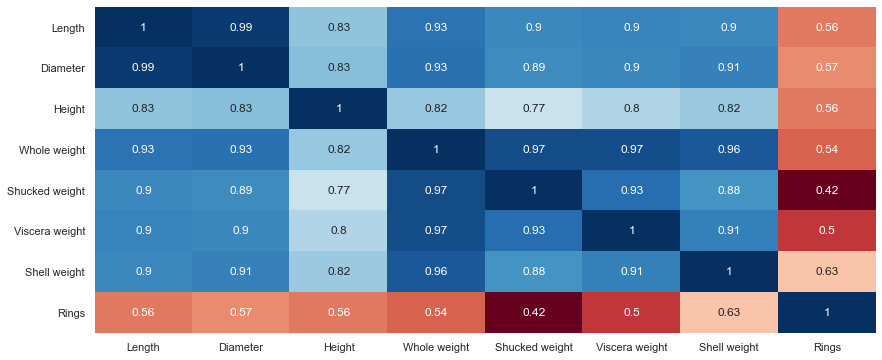

In [8]:
plt.figure(figsize=(14,6))
sns.heatmap(abalone_df.corr(), annot=True, cbar=False, cmap='RdBu')
plt.show()

## Relation with target variable

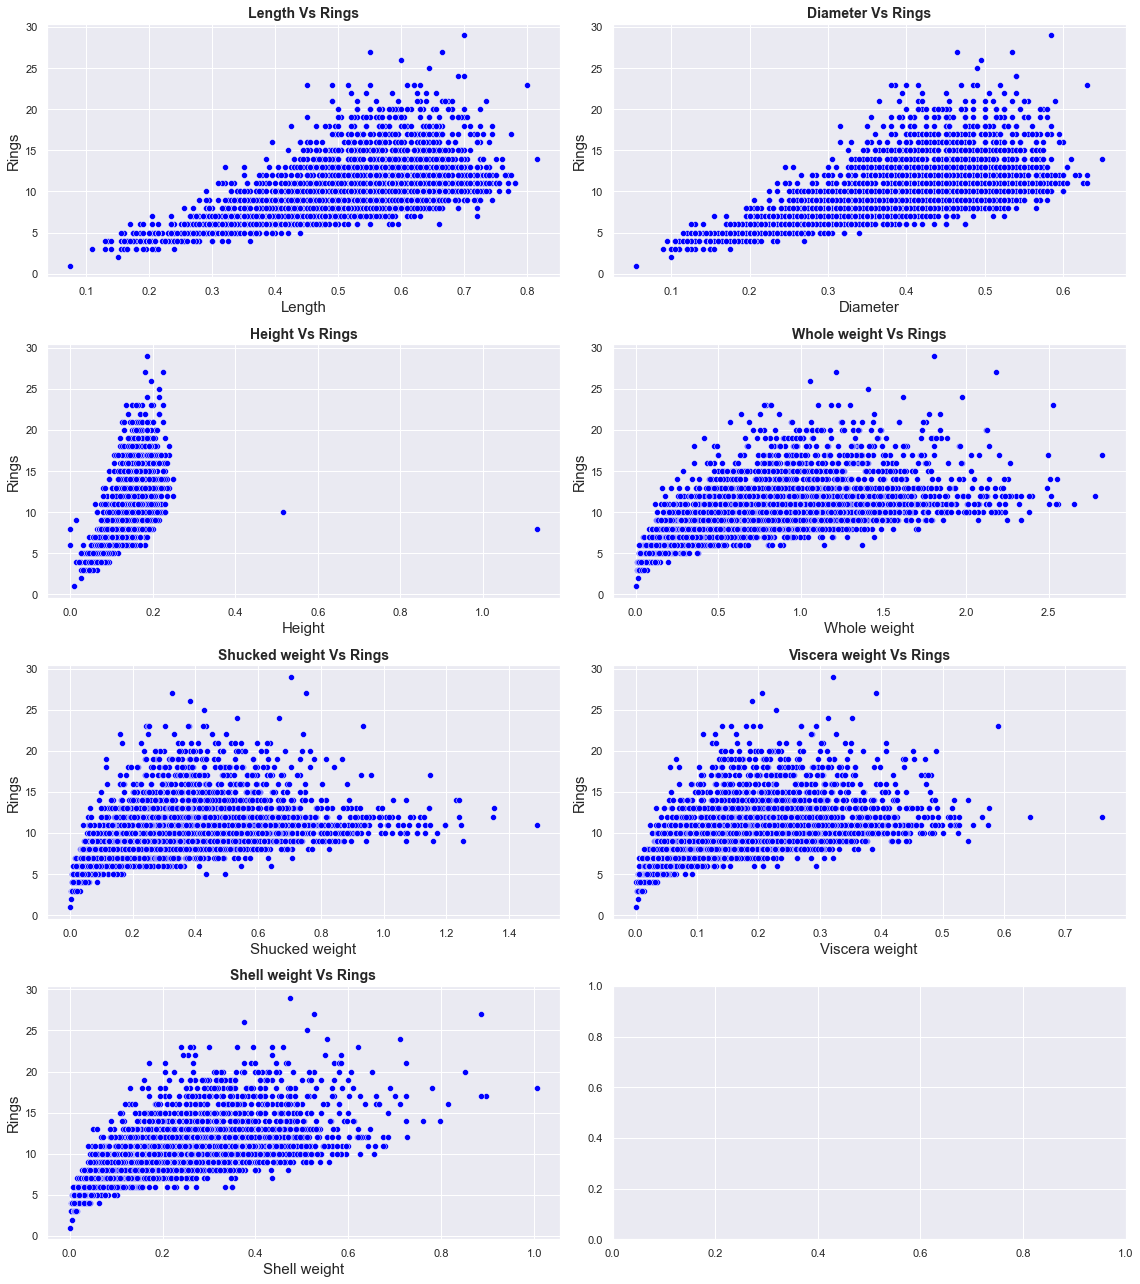

In [9]:
fig, axes = plt.subplots(4,2,figsize=(16, 18))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    _ = sns.scatterplot(x=abalone_df[c], y=abalone_df[target],ax=axes[i], color='blue')
    axes[i].set_title(f"{c} Vs Rings", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(c, fontsize=15)
    axes[i].set_ylabel('Rings', fontsize=15)
    
plt.tight_layout()
plt.show()

# Preprocessing for classification problem

## Dividing rings into groups
- Try
* Rings vary from 1 to 29, gruop them in 6 
    - Class 1 - Rings from 1-5
    - Class 2 - Rings from 6-10
    - Class 3 - Rings from 11-15
    - Class 4 - Rings from 16-20
    - Class 5 - Rings from 21-25
    - Class 6 - Rings from 26-30

* Try grouping them in 3
    - Class 1 - Rings from 1-10
    - Class 2 - Rings from 11-20
    - Class 3 - Rings from 21-30

In [10]:
#Tried labling them in 6 classes, got accuracy score of Accuracy Score= 0.6594464500601684 for decision tree model
def get_RingClassLabel_6(rings):
    if rings in [1,2,3,4,5]:
        return 1
    if rings in [6,7,8,9,10]:
        return 2
    if rings in [11,12,13,14,15]:
        return 3
    if rings in [16,17,18,19,20]:
        return 4
    if rings in [21,22,23,24,25]:
        return 5
    else: #[26,27,28,29,30]
        return 6

In [11]:
#Tried labeling them in 3 classes , Accuracy Score= 0.7484957882069796 for decision tree model
def get_RingClassLabel_3(rings):
    if rings in [1,2,3,4,5,6,7,8,9,10]:
        return 1
    if rings in [11,12,13,14,15,16,17,18,19,20]:
        return 2
    if rings in [21,22,23,24,25,26,27,28,29,30]:
        return 3
  

In [12]:
abalone_df['Ring Class label'] = abalone_df.apply(lambda x: get_RingClassLabel_3(x['Rings']),axis=1)
#abalone_df['Ring Class label'] = abalone_df.apply(lambda x: get_RingClassLabel_6(x['Rings']),axis=1)

<AxesSubplot:title={'center':'Rings'}, ylabel='Frequency'>

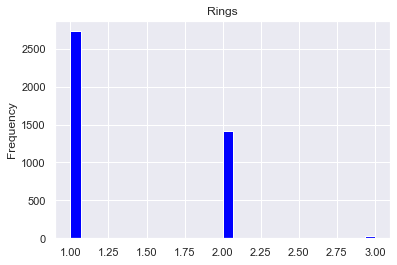

In [13]:
abalone_df["Ring Class label"].plot(kind = 'hist', title='Rings', color='blue', bins=30)

## One hot encoding

In [14]:
abalone_df = pd.get_dummies(abalone_df,columns=['Sex'])
abalone_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Ring Class label,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,2,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,1,0,0


## Handle multicollinearity

In [15]:
abalone_df.drop(['Sex_M'],axis=1,inplace=True)
abalone_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Ring Class label,Sex_F,Sex_I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,2,1,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1,0,0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1,0,0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,1,0


## Check for outliers

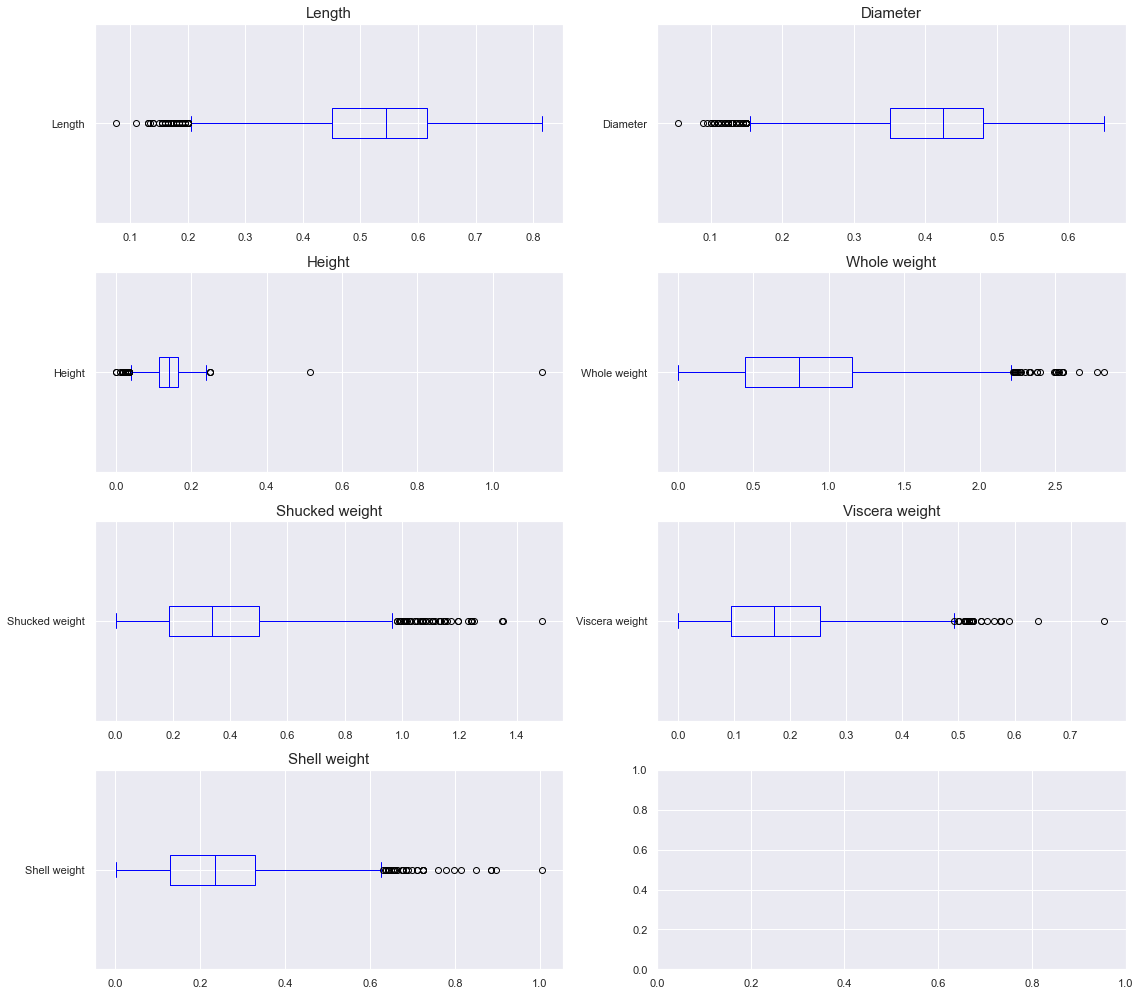

In [16]:
fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = abalone_df[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

## Remove extreme outliers

In [17]:
idx = abalone_df.loc[abalone_df.Height>0.4].index
abalone_df.drop(idx, inplace=True)

idx = abalone_df.loc[abalone_df['Viscera weight']>0.6].index
abalone_df.drop(idx, inplace=True)

idx = abalone_df.loc[abalone_df['Shell weight']>0.8].index
abalone_df.drop(idx, inplace=True)

idx = abalone_df.loc[abalone_df['Shucked weight']>1.2].index
abalone_df.drop(idx, inplace=True)

idx = abalone_df.loc[abalone_df['Whole weight']>2.5].index
abalone_df.drop(idx, inplace=True)

#When doing ENN, knn was 6 and there are samples which has Ring values 1, hencing deleting these
#idx = abalone_df.loc[abalone_df['Age']>=24.5].index
#abalone_df.drop(idx, inplace=True)

#idx = abalone_df.loc[abalone_df['Age']<=3.5].index
#abalone_df.drop(idx, inplace=True)


In [18]:
abalone_copy_df = abalone_df.copy()

In [19]:
#Drop rings column
abalone_df.drop(["Rings"],axis=1,inplace=True)
abalone_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Ring Class label,Sex_F,Sex_I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1,0,1
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,2,1,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1,0,0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1,0,0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,1,0


In [20]:
#X = abalone_df.drop(["Age"],axis=1)
#X = abalone_df[["Diameter","Length"]]
#X = abalone_df[['Whole weight','Shucked weight','Viscera weight','Shell weight','Length','Diameter','Height','Sex_F','Sex_I']]
X = abalone_df.drop(["Ring Class label"],axis=1)
#X = abalone_df[['Whole weight','Shucked weight','Viscera weight','Shell weight','Length']]
#X = abalone_df[['Whole weight','Shucked weight','Viscera weight','Shell weight','Length','Diameter']]
#y = abalone_df['Age']
y = abalone_df['Ring Class label']

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) #stratify=y


In [22]:
#Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Use classfiers for predicting ring labels

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier 
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report

In [24]:
#Decision Tree model
dt_params = {# 'criterion':'mse',
            'max_depth': 10
             ,'min_samples_split': 4
             ,'min_samples_leaf':0.04
             , 'max_features':0.8
            }


dtmodel = DecisionTreeClassifier(random_state=42,**dt_params)
evaluate_model(dtmodel, X_train, y_train, X_test, y_test)    

Precision-Recall report= (0.7471632982748754, 0.7484957882069796, 0.7471123167784482, None)
Accuracy Score= 0.7484957882069796


In [25]:
#Random Forest Model
rf_params = {'n_estimators':90
             ,'min_samples_split': 4
             ,'min_samples_leaf': 0.04
             ,'max_depth': 10
             ,'bootstrap': True
             }

rfmodel = RandomForestClassifier(random_state=42,**rf_params)
evaluate_model(rfmodel, X_train, y_train, X_test, y_test)

Precision-Recall report= (0.7261725336273138, 0.7424789410348978, 0.7313530190740302, None)
Accuracy Score= 0.7424789410348978


In [26]:
#XG boost model
xbg_params = {'objective': 'reg:squarederror',
        'colsample_bytree': 0.5,
        'learning_rate': 0.05,
        'max_depth': 6,
        'min_child_weight': 1,
        'n_estimators': 1000,
        'subsample': 0.7
    }

xgmodel = XGBClassifier(random_state=42,**xbg_params)
evaluate_model(xgmodel, X_train, y_train, X_test, y_test)

[13:53:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision-Recall report= (0.7519756976994147, 0.7581227436823105, 0.7549480377305444, None)
Accuracy Score= 0.7581227436823105


In [27]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Decision_Tree',dtmodel),('Random_Forest',rfmodel),('XGBoost',xgmodel)]
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train,y_train)
y_pred_vc = vc.predict(X_test)
evaluate_model(vc, X_train, y_train, X_test, y_test)

[13:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:54:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision-Recall report= (0.7530529525994083, 0.7617328519855595, 0.7573634517929175, None)
Accuracy Score= 0.7617328519855595


## Plot confusion matrix and classification report for Random Forest model

In [28]:
y_pred = rfmodel.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[470,  76,   0],
       [129, 147,   0],
       [  3,   6,   0]], dtype=int64)

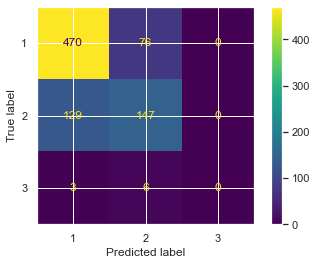

In [29]:
plot_confusion_matrix(rfmodel,X_test,y_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.86      0.82       546
           2       0.64      0.53      0.58       276
           3       0.00      0.00      0.00         9

    accuracy                           0.74       831
   macro avg       0.47      0.46      0.47       831
weighted avg       0.73      0.74      0.73       831



## Predicting age as Regression problem

In [31]:
#models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import (mean_squared_error,r2_score)

In [32]:
#Function to get RMSE and r2_score
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


def evaluate_reg_model(model, X_train, y_train, X_test, y_test):
    _ = model.fit(X_train, y_train)
    print("Train rmse : ", rmse(y_train, model.predict(X_train)), "Train MSE:",mean_squared_error(y_train, model.predict(X_train)))
    print("Test rmse : ", rmse(y_test, model.predict(X_test)), "Test MSE:",mean_squared_error(y_test, model.predict(X_test)))
    print("R2 score : ",r2_score(y_test,model.predict(X_test)))

## Preprocessing for regression problem

In [33]:
abalone_df.shape

(4155, 10)

In [34]:
abalone_copy_df.shape

(4155, 11)

In [35]:
#Calculate age column based on rings
abalone_df['Age'] = abalone_copy_df.Rings + 1.5

#Drop rings column
abalone_df.drop(["Ring Class label"],axis=1,inplace=True)
abalone_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,11.5


In [36]:
#X = abalone_df[rfe_features]
#X = abalone_df[['Whole weight','Shucked weight','Viscera weight','Shell weight','Length','Diameter','Height']]
#X = abalone_df[['Whole weight','Shucked weight','Viscera weight','Shell weight']]
#X = abalone_df[['Shell weight','Shucked weight']]
X = abalone_df.drop(["Age"],axis=1)
y = abalone_df['Age']

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42) #stratify=y

## Decision tree

In [38]:
#Decision Tree regressor parmaters
dt_params = {# 'criterion':'mse',
            'max_depth': 10
             ,'min_samples_split': 4
             ,'min_samples_leaf':0.04
             , 'max_features':0.8
            }

#'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.04, 'min_samples_split': 3
                
#from sklearn.model_selection import cross_val_score
#mse_cv = cross_val_score(dtmodel,X_train,y_train,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)

# Compute the 10-folds CV RMSE
#RMSE_CV = (mse_cv.mean())**(1/2)

# Print RMSE_CV
#print('CV RMSE: {:.2f}'.format(RMSE_CV))

dtmodel = DecisionTreeRegressor(random_state=42,**dt_params)
evaluate_reg_model(dtmodel, X_train, y_train, X_test, y_test)



Train rmse :  2.2708641862118992 Train MSE: 5.156824152219832
Test rmse :  2.4710077308437173 Test MSE: 6.1058792058894165
R2 score :  0.4456277706336266


In [39]:
#Try with GradientBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor(n_estimators=40,max_depth=4,random_state=42)
evaluate_reg_model(gbt, X_train, y_train, X_test, y_test)

Train rmse :  1.8364378368260394 Train MSE: 3.372503928526303
Test rmse :  2.294996999251378 Test MSE: 5.267011226572829
R2 score :  0.5217912675120521


In [40]:
#Import GridSeach
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
scoring = make_scorer(r2_score)

# Define the grid of hyperparameters 'params_dt'
params_dt = {'max_depth': [3, 4,5, 6,7,8],
             'min_samples_leaf': [0.04, 0.06, 0.08],
             'max_features': [0.2, 0.4,0.6, 0.8] ,
             'min_samples_split': [3,4,5,6]}

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dtmodel,param_grid=params_dt,scoring=scoring, cv=3,n_jobs=-1)
# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy', best_CV_score)



Best hyerparameters:
 {'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.04, 'min_samples_split': 3}
Best CV accuracy 0.45843060656921436


## Random Forest

In [41]:
#Random forest parameters
rf_params = {'n_estimators':500,
             'min_samples_split': 4,
             'min_samples_leaf': 0.12, 
             'max_depth': 4 
             ,'bootstrap': False
             }

# ,

rfmodel = RandomForestRegressor(random_state=21,**rf_params)
evaluate_reg_model(rfmodel, X_train, y_train, X_test, y_test)

Train rmse :  2.406335658540512 Train MSE: 5.790451301563598
Test rmse :  2.565439076954654 Test MSE: 6.581477657565945
R2 score :  0.4024466717208277


## XG Boost - Best performing compared to decision tree and random forest

In [42]:
# XG Boost parameters
xbg_params = {'objective': 'reg:squarederror',
        'colsample_bytree': 0.5,
        'learning_rate': 0.05,
        'max_depth': 6,
        'min_child_weight': 1,
        'n_estimators': 1000,
        'subsample': 0.7
    }

xgmodel = XGBRegressor(random_state=21,**xbg_params)
evaluate_reg_model(xgmodel, X_train, y_train, X_test, y_test)

Train rmse :  0.4998271024853625 Train MSE: 0.24982713237891307
Test rmse :  2.322773108403858 Test MSE: 5.395274913124121
R2 score :  0.5101457987003526


## Feature importance in Random Forest model

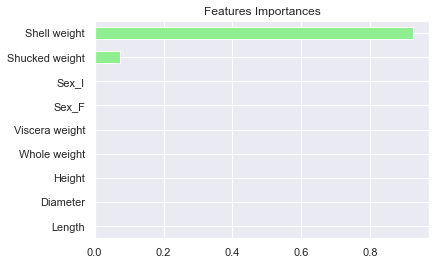

In [43]:
# Create a pd.Series of features importances
importances = pd.Series(data=rfmodel.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()